In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Plot Experiments

1. warm-start_train-both: 14 observations
2. warm-start_train-only-downstream: 14 observations
3. only-downstream: 15 observations
4. cold-start_train-both: 8 observations
5. upstream-warm-downstream-cold-train-only-downstream: 15 observations
6. warm-start_train-both-impute-only-missing: 22 observations


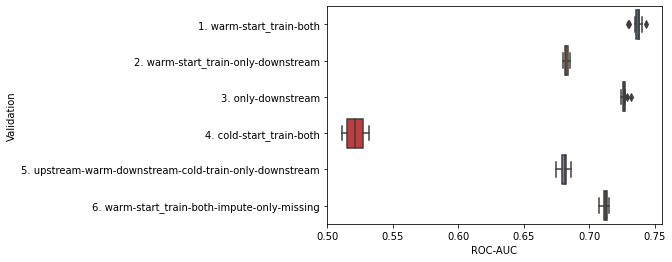

1. warm-start_train-both: 14 observations
1b. warm-start_train-both, registered: 20 observations
2. warm-start_train-only-downstream: 14 observations
3. only-downstream: 15 observations
3b. only-downstream-registered: 50 observations
5. upstream-warm-downstream-cold-train-only-downstream: 15 observations
6. warm-start_train-both-impute-only-missing: 22 observations
7. warm-start_train-both, weight 0.5 to reconstruction: 7 observations
8. warm-start_train-both, dynamic reconstruction regime: 8 observations


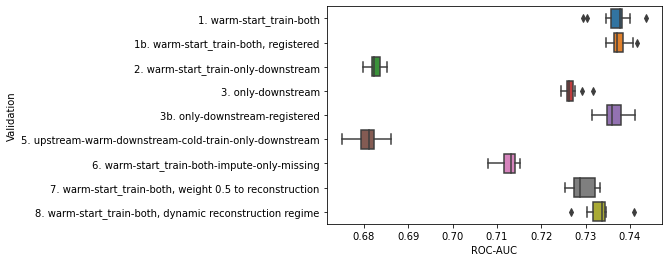

1. warm-start_train-both: 14 observations
1b. warm-start_train-both, registered: 20 observations
2. warm-start_train-only-downstream: 14 observations
3. only-downstream: 15 observations
3b. only-downstream-registered: 50 observations
5. upstream-warm-downstream-cold-train-only-downstream: 15 observations
6. warm-start_train-both-impute-only-missing: 22 observations
7. warm-start_train-both, weight 0.5 to reconstruction: 7 observations
8. warm-start_train-both, dynamic reconstruction regime: 8 observations


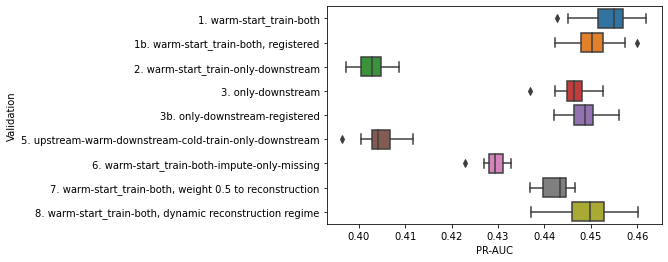

In [2]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# comparisson:
# a: both_stages_being_trained_warm_start
# b: warm start, only downstream being trained
# c: only downsteam




def plot_results(paths, names, kpi='roc-auc', show_test_as_well = False):
    KPI = kpi.upper()
    results = dict()
    # load
    for name,path in zip(names,paths):
        with open(path, 'rb') as handle:
            results[name] = pickle.load(handle)
    
    # create validation df
    validation_results_df = pd.DataFrame()
    for name in names:
        N_group=len(results[name][f'validation-{kpi}'])
        print(f'{name}: {N_group} observations')
        roc_auc_temp = results[name][f'validation-{kpi}']
        group_temp   = [name]*N_group
        df_temp      = pd.DataFrame({
            KPI: roc_auc_temp,
            'Validation': group_temp
        })
        validation_results_df = pd.concat([validation_results_df,df_temp],axis=0, ignore_index=True)
    
    # create test df
    test_results_df = pd.DataFrame()
    for name in names:
        roc_auc_temp = results[name][f'test-{kpi}']
        group_temp   = [name]*len(results[name][f'test-{kpi}'])
        df_temp      = pd.DataFrame({
            KPI: roc_auc_temp,
            'Test': group_temp
        })
        test_results_df = pd.concat([test_results_df,df_temp],axis=0, ignore_index=True)
    
    # plot
    if show_test_as_well:
        fig, axs = plt.subplots(2, sharex=True)
        sns.boxplot(data = validation_results_df, x = KPI, y='Validation', ax=axs[0])
        # axs[0].set_title('Validation')
        
        sns.boxplot(data = test_results_df, x = KPI, y='Test', ax=axs[1])
        # axs[1].set_title('Test')
        
        # plt.tight_layout()
    else:
        sns.boxplot(data = validation_results_df, x = KPI, y='Validation')
    plt.show()



paths = ['/home/david/Desktop/projects/thesis/combined_downstream_upstream/models/AF-V5-different-seeds/best_rocauc_and_pr_auc.pkl',
         '/home/david/Desktop/projects/thesis/combined_downstream_upstream/models/AF-V6-different-seeds/best_rocauc_and_pr_auc.pkl',
         '/home/david/Desktop/projects/thesis/downstream_classification/models/AF-V9-different-seeds/best_rocauc_and_pr_auc.pkl',
         '/home/david/Desktop/projects/thesis/combined_downstream_upstream/models/AF-V7-different-seeds/best_rocauc_and_pr_auc.pkl',
         '/home/david/Desktop/projects/thesis/combined_downstream_upstream/models/AF-V8-different-seeds/best_rocauc_and_pr_auc.pkl',
         '/home/david/Desktop/projects/thesis/combined_downstream_upstream/models/AF-V9-different-seeds/best_rocauc_and_pr_auc.pkl',
         ]
names = ['1. warm-start_train-both',
         '2. warm-start_train-only-downstream',
         '3. only-downstream',
         '4. cold-start_train-both',
         '5. upstream-warm-downstream-cold-train-only-downstream',         
         '6. warm-start_train-both-impute-only-missing',
         ]

plot_results(paths, names)


paths = ['/home/david/Desktop/projects/thesis/combined_downstream_upstream/models/AF-V5-different-seeds/best_rocauc_and_pr_auc.pkl',
         '/home/david/Desktop/projects/thesis/combined_downstream_upstream/models/AF-V12-registered-downstream/best_rocauc_and_pr_auc.pkl',
         '/home/david/Desktop/projects/thesis/combined_downstream_upstream/models/AF-V6-different-seeds/best_rocauc_and_pr_auc.pkl',
         '/home/david/Desktop/projects/thesis/downstream_classification/models/AF-V9-different-seeds/best_rocauc_and_pr_auc.pkl',
         '/home/david/Desktop/projects/thesis/downstream_classification/models/AF-V10-different-seeds-registered/best_rocauc_and_pr_auc.pkl',
        #  '/home/david/Desktop/projects/thesis/combined_downstream_upstream/models/AF-V7-different-seeds/best_rocauc_and_pr_auc.pkl',
         '/home/david/Desktop/projects/thesis/combined_downstream_upstream/models/AF-V8-different-seeds/best_rocauc_and_pr_auc.pkl',
         '/home/david/Desktop/projects/thesis/combined_downstream_upstream/models/AF-V9-different-seeds/best_rocauc_and_pr_auc.pkl',
         '/home/david/Desktop/projects/thesis/combined_downstream_upstream/models/AF-V10-different-seeds-again2/best_rocauc_and_pr_auc_combined.pkl',
         '/home/david/Desktop/projects/thesis/combined_downstream_upstream/models/AF-V11-first-reconstruction-then-training-again/best_rocauc_and_pr_auc.pkl',
         ]
names = ['1. warm-start_train-both',
         '1b. warm-start_train-both, registered',
         '2. warm-start_train-only-downstream',
         '3. only-downstream',
         '3b. only-downstream-registered',
        #  'cold-start_train-both',
         '5. upstream-warm-downstream-cold-train-only-downstream',         
         '6. warm-start_train-both-impute-only-missing',
         '7. warm-start_train-both, weight 0.5 to reconstruction',
         '8. warm-start_train-both, dynamic reconstruction regime',
         ]

plot_results(paths, names)

plot_results(paths, names, kpi='pr-auc')

# Load a model and Get scores

In [7]:
import numpy as np
import pickle 
import torch
import torch.nn as nn

import os
os.chdir('/home/david/Desktop/projects/thesis')

from downstream_classification.dataloader.DataGenerator import DataGenerator
from combined_downstream_upstream.executors.train_combined_model import *
from combined_downstream_upstream.utils.LoadModels import *

# sanity check

# test_generator = DataGenerator(
#     metadata_file_path= './downstream_classification/data/combined_data/metadata_only_existant_readings_09042023.csv',
#     data_folder_path = './downstream_classification/data/individual-signals/',
#     sample='test',
#     targets=['AF'],
#     batch_size=128,
#     shuffle=False,
#     seed = 42
#     )
# print('Individual Signals')
# print(test_generator.__getitem__(1)[-1])


# test_generator_registered = DataGenerator(
#     metadata_file_path= './downstream_classification/data/combined_data/metadata_only_existant_readings_09042023.csv',
#     data_folder_path = './downstream_classification/data/individual-signals-registered/',
#     sample='test',
#     targets=['AF'],
#     batch_size=128,
#     shuffle=False,
#     seed = 42
#     )
# print('Individual Signals - Registered')
# print(test_generator_registered.__getitem__(1)[-1])

In [3]:

import numpy as np
import pickle 
import torch
import torch.nn as nn

import os
os.chdir('/home/david/Desktop/projects/thesis')

from downstream_classification.dataloader.DataGenerator import DataGenerator
from combined_downstream_upstream.executors.train_combined_model import *
from combined_downstream_upstream.utils.LoadModels import *

test_generator = DataGenerator(
    metadata_file_path= './downstream_classification/data/combined_data/metadata_only_existant_readings_09042023.csv',
    data_folder_path = './downstream_classification/data/individual-signals/',
    sample='test',
    targets=['AF'],
    batch_size=128,
    shuffle=False,
    seed = 42
    )

test_generator_registered = DataGenerator(
    metadata_file_path= './downstream_classification/data/combined_data/metadata_only_existant_readings_09042023.csv',
    data_folder_path = './downstream_classification/data/individual-signals-registered/',
    sample='test',
    targets=['AF'],
    batch_size=128,
    shuffle=False,
    seed = 42
    )

# path_to_weights = './combined_downstream_upstream/models/AF-V12-registered-downstream/model_val_rocauc.pt'

def load_model(path_to_weights):
    upstream_params = {
        'input_dimension': 12,
        'output_dimension': 12,              
        'hidden_dimmension':  128,           # d_model (int) – the number of expected features in the input (required)???,
        'attention_heads': 8,               # number of attention heads, if None then d_model//64,
        'encoder_number_of_layers': 8,
        'dropout': 0.4,
        'clip': 1,
        'positional_encodings': False,
        'device':'cuda'
    }
    best_rocauc_and_pr_auc = {
        'seed':[],
        'validation-roc-auc':[],
        'validation-pr-auc':[],
        'test-roc-auc':[],
        'test-pr-auc':[],
    }

    device = 'cuda'
    seed = 123
    upstream_model   = load_upstream_model(upstream_params, folder_path = './upstream_seq2seq/models/', model_name = 'transformer_cnn_4heads')
    downstream_model = load_downstream_model(dropout=0.5,scale=1,num_inputs=12, weights_path='./downstream_classification/models/AF-V10-different-seeds-registered/model_val_rocauc.pt')

    # Initialize the model
    model = CombinedModel(upstream_model, downstream_model, device, False, False)
    
    # Load the state dictionary
    state_dict = torch.load(path_to_weights)
    model.load_state_dict(state_dict)

    model.eval()
    model = model.to(device)

    return model
    
registered_joint_training = load_model('./combined_downstream_upstream/models/AF-V12-registered-downstream/model_val_rocauc.pt')
joint_training = load_model('./combined_downstream_upstream/models/AF-V5-different-seeds/model_val_rocauc.pt')

# tba
# only_downstream = load_model('./combined_downstream_upstream/models/AF-V5-different-seeds/model_val_rocauc.pt')

results_registered = evaluate_mutilpe_models([registered_joint_training], test_generator_registered, 'cuda')
results_joint = evaluate_mutilpe_models([joint_training], test_generator, 'cuda')



cuda
Upstream Model File Path: ./upstream_seq2seq/models/transformer_cnn_4heads_1701990699.9536803.pt
Num attention heads: 8
Upstream Model File Path: ./upstream_seq2seq/models/transformer_cnn_4heads_1701990699.9536803.pt
Num attention heads: 8


/home/david/anaconda3/lib/python3.9/site-packages/torch/nn/modules/transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")
Within epoch loss (validation): 100%|██████████| 433/433 [01:00<00:00,  7.21it/s]


In [19]:
redistered_results = pd.DataFrame(results_registered[0]).T
joint_training_results = pd.DataFrame(results_joint[0]).T

redistered_results.columns = ['y_registered', 'y_pred_registered', 'id']
redistered_results['id'] = redistered_results['id'].astype(int)
joint_training_results.columns = ['y_joint_training', 'y_pred_joint_training', 'id']
joint_training_results['id'] = joint_training_results['id'].astype(int)

print(redistered_results.shape, joint_training_results.shape)

display(
    joint_training_results.merge(
        redistered_results,
        on = 'id',
        how='outer',
        indicator=True
    )['_merge'].value_counts()
)
results = joint_training_results.merge(
        redistered_results,
        on = 'id',
        how='outer',
        indicator=False
    )
assert (results['y_joint_training'] == results['y_registered']).mean()==1, 'not equal outcomes'
results.rename({'y_joint_training':'y'}, axis=1, inplace=True)
results.drop(['y_registered'], axis=1,inplace=True)
results.iloc[:10]



(55424, 3) (55424, 3)


both          55424
left_only         0
right_only        0
Name: _merge, dtype: int64

,y,y_pred_joint_training,id,y_pred_registered
0,1.0,0.122558,487286,0.124177
1,0.0,0.330593,468825,0.149521
2,0.0,0.249649,304101,0.152514
3,0.0,0.206308,540684,0.296606
4,0.0,0.429951,469169,0.534699
5,0.0,0.155449,268494,0.131878
6,0.0,0.265749,379544,0.275933
7,0.0,0.136005,463345,0.166925
8,0.0,0.236955,290271,0.248340
9,0.0,0.124661,538590,0.118835


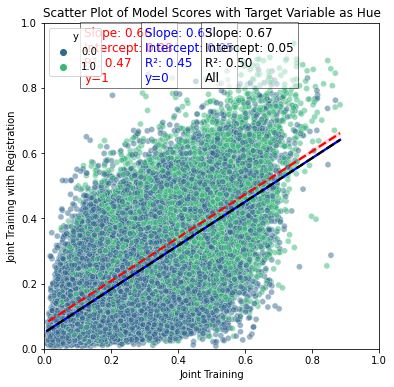

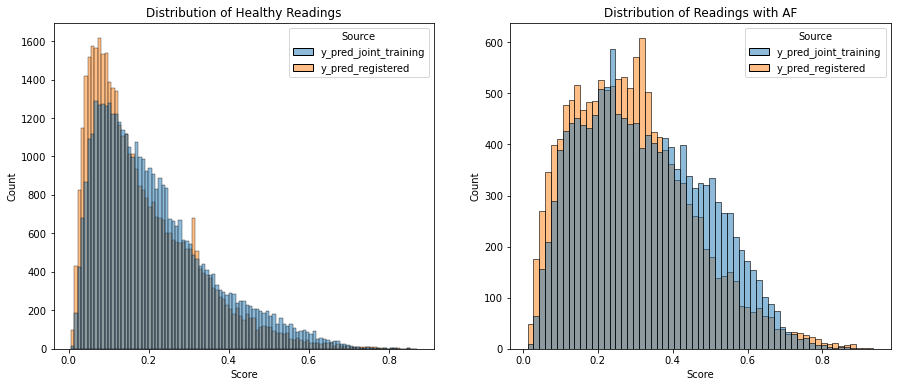

In [48]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats


# Create a scatter plot with Seaborn
plt.figure(figsize=(6, 6))
scatter_plot = sns.scatterplot(data=results, 
                               x='y_pred_joint_training', 
                               y='y_pred_registered', 
                               hue='y', 
                               palette='viridis',
                               alpha=0.5)

# Addint a linear regression
mask = (results['y'] == 1)
slope_1, intercept_1, r_value_1, p_value_1, std_err_1 = stats.linregress(results['y_pred_joint_training'][mask], results['y_pred_registered'][mask])
r_squared_1 = r_value_1**2

sns.regplot(data=results[mask], x='y_pred_joint_training', y='y_pred_registered', scatter=False, color='red', line_kws={"linestyle":"--"})
plt.text(0.12, 0.82, f'Slope: {slope_1:.2f}\nIntercept: {intercept_1:.2f}\nR²: {r_squared_1:.2f}\ny=1', transform=plt.gca().transAxes, 
         fontsize=12, color='red', bbox=dict(facecolor='white', alpha=0.5))


mask = (results['y'] == 0)
slope_0, intercept_0, r_value_0, p_value_0, std_err_0 = stats.linregress(results['y_pred_joint_training'][mask], results['y_pred_registered'][mask])
r_squared_0 = r_value_0**2
sns.regplot(data=results, x='y_pred_joint_training', y='y_pred_registered', scatter=False, color='blue') #, line_kws={"linestyle":"--"})
plt.text(0.3, 0.82, f'Slope: {slope_0:.2f}\nIntercept: {intercept_0:.2f}\nR²: {r_squared_0:.2f}\ny=0', transform=plt.gca().transAxes, 
         fontsize=12, color='blue', bbox=dict(facecolor='white', alpha=0.5))


## unrestricted
slope, intercept, r_value, p_value, std_err = stats.linregress(results['y_pred_joint_training'], results['y_pred_registered'])
r_squared = r_value**2
sns.regplot(data=results, x='y_pred_joint_training', y='y_pred_registered', scatter=False, color='black', line_kws={"linestyle":"--"})
plt.text(0.48, 0.82, f'Slope: {slope:.2f}\nIntercept: {intercept:.2f}\nR²: {r_squared:.2f}\nAll', transform=plt.gca().transAxes, 
         fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.5))


# Add plot title and labels
plt.title('Scatter Plot of Model Scores with Target Variable as Hue')
plt.xlabel('Joint Training')
plt.ylabel('Joint Training with Registration')

plt.xlim(0, 1)
plt.ylim(0, 1)

# Show the plot
plt.show()


# Histplot
# -----------
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

mask = (results['y'] == 0)
# Transform the dataset into a "long" format
long_format_0 = pd.melt(results[mask], id_vars=['y'], value_vars=['y_pred_joint_training', 'y_pred_registered'],
                      var_name='Source', value_name='Score')
sns.histplot(long_format_0, x = 'Score', hue = 'Source', ax=axes[0])
axes[0].set_title("Distribution of Healthy Readings")

mask = (results['y'] == 1)
# Transform the dataset into a "long" format
long_format_1 = pd.melt(results[mask], id_vars=['y'], value_vars=['y_pred_joint_training', 'y_pred_registered'],
                      var_name='Source', value_name='Score')
sns.histplot(long_format_1, x = 'Score', hue = 'Source', ax=axes[1])
axes[1].set_title("Distribution of Readings with AF")
plt.show()

In [96]:
def gini_coefficient(x):
    """Compute Gini coefficient of array of values"""
    diffsum = 0
    for i, xi in enumerate(x[:-1], 1):
        diffsum += np.sum(np.abs(xi - x[i:]))
    return diffsum / (len(x)**2 * np.mean(x))

print('Gini:', gini_coefficient(results['difference_in_score']))

mask = (results['y'] == 0)
print('Gini | y=0):', gini_coefficient(results[mask]['difference_in_score']))

mask = (results['y'] == 1)
print('Gini | y=1):', gini_coefficient(results[mask]['difference_in_score']))


Gini): 0.4715362768076349
Gini | y=0): 0.47885007871097307
Gini | y=1): 0.4439654698385929


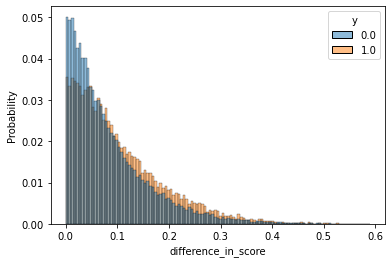

In [93]:
results['difference_in_score'] = np.abs(results['y_pred_joint_training'] - results['y_pred_registered'])
sns.histplot(results, x='difference_in_score', hue= 'y', common_norm=False, stat='probability')
plt.show()

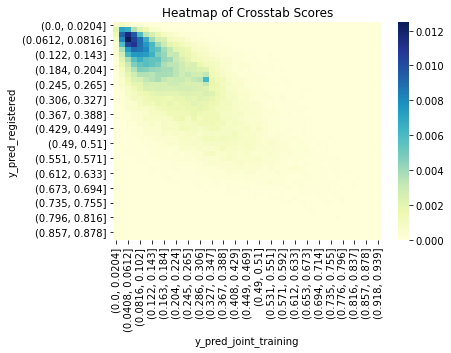

In [90]:

def joint_distribution_heatmap(data, model1_scores, model2_scores, bins=100):
    boundaries = np.linspace(0,1,bins)

    categories_1 = pd.cut(data[model1_scores], boundaries)
    categories_2 = pd.cut(data[model2_scores], boundaries)

    # Plotting with Seaborn
    sns.heatmap(pd.crosstab(categories_1,categories_2, normalize=True), annot=False, cmap='YlGnBu', fmt='d')
    plt.title('Heatmap of Crosstab Scores')
    plt.xlabel('y_pred_joint_training')
    plt.ylabel('y_pred_registered')
    plt.show()
joint_distribution_heatmap(data=results, model1_scores='y_pred_joint_training', model2_scores='y_pred_registered', bins=50)

# Registered vs downsteam